In [2]:
import numpy as np, pandas as pd
import scipy
from scipy.stats import rankdata
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

In [3]:
scipy.__version__

'1.7.1'

# A 2-dim random sample

In [31]:
n = 500

## Bivariate Normal

In [33]:
mean = [0,0] 
cov = [[1, 0], [0, 1]]
normal_sample = np.random.multivariate_normal(mean, cov, 500)

## Bivariate Uniform

In [34]:
xy_min = [0, 0]
xy_max = [10, 10]
uniform_sample = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

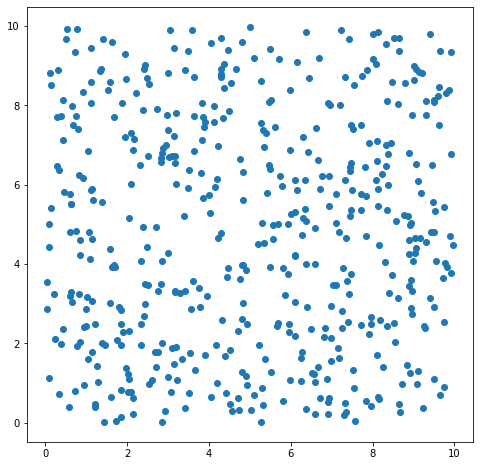

In [35]:
sample = uniform_sample
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(sample[:,0], sample[:,1])

# Calculate Pairwise Distances

In [36]:
N = len(sample)
distance_matrix = np.zeros([N, N])

for j in range(N):
    for i in range(N):
        distance_matrix[i,j] = (euclidean(sample[i], sample[j]))

distance_matrix

array([[0.        , 9.40233372, 6.65957551, ..., 9.04275451, 6.1400977 ,
        3.72810337],
       [9.40233372, 0.        , 5.05636958, ..., 6.15562032, 3.29311372,
        5.73326155],
       [6.65957551, 5.05636958, 0.        , ..., 9.22290869, 3.11015727,
        3.55048808],
       ...,
       [9.04275451, 6.15562032, 9.22290869, ..., 0.        , 6.11285788,
        7.04133863],
       [6.1400977 , 3.29311372, 3.11015727, ..., 6.11285788, 0.        ,
        2.44178058],
       [3.72810337, 5.73326155, 3.55048808, ..., 7.04133863, 2.44178058,
        0.        ]])

In [37]:
# Replace diagonal with a large number to prevent trivial matching

M = np.max(distance_matrix)
np.fill_diagonal(distance_matrix, 2 * M)

In [38]:
distance_matrix[:5,:5]

array([[25.99564623,  9.40233372,  6.65957551,  2.09345815,  9.1868159 ],
       [ 9.40233372, 25.99564623,  5.05636958,  8.04693076,  2.72200605],
       [ 6.65957551,  5.05636958, 25.99564623,  6.46999354,  6.83790861],
       [ 2.09345815,  8.04693076,  6.46999354, 25.99564623,  7.39979246],
       [ 9.1868159 ,  2.72200605,  6.83790861,  7.39979246, 25.99564623]])

# A minimum distance non-bipartite matching on `sample`  

Equivalently, a linear sum assignment between `sample` and `sample`.  

To prevent a trivial matching (each element matching with itself), I have replaced the diagonal zeros with a large number.

In [39]:
# scipy.optimize.linear_sum_assignment

row, col = scipy.optimize.linear_sum_assignment(distance_matrix, maximize=False)

nonbipartite_matching = np.concatenate([[row], [col]]).T.tolist()

In [40]:
nonbipartite_matching

[[0, 348],
 [1, 136],
 [2, 297],
 [3, 324],
 [4, 183],
 [5, 246],
 [6, 345],
 [7, 350],
 [8, 18],
 [9, 481],
 [10, 144],
 [11, 259],
 [12, 433],
 [13, 326],
 [14, 359],
 [15, 224],
 [16, 244],
 [17, 160],
 [18, 427],
 [19, 204],
 [20, 113],
 [21, 54],
 [22, 58],
 [23, 421],
 [24, 234],
 [25, 69],
 [26, 76],
 [27, 492],
 [28, 390],
 [29, 92],
 [30, 271],
 [31, 325],
 [32, 283],
 [33, 181],
 [34, 232],
 [35, 266],
 [36, 88],
 [37, 411],
 [38, 284],
 [39, 499],
 [40, 277],
 [41, 105],
 [42, 280],
 [43, 50],
 [44, 209],
 [45, 89],
 [46, 222],
 [47, 320],
 [48, 487],
 [49, 347],
 [50, 43],
 [51, 340],
 [52, 335],
 [53, 195],
 [54, 257],
 [55, 425],
 [56, 445],
 [57, 70],
 [58, 22],
 [59, 93],
 [60, 253],
 [61, 73],
 [62, 56],
 [63, 431],
 [64, 100],
 [65, 432],
 [66, 391],
 [67, 81],
 [68, 302],
 [69, 25],
 [70, 57],
 [71, 85],
 [72, 291],
 [73, 61],
 [74, 480],
 [75, 210],
 [76, 26],
 [77, 285],
 [78, 370],
 [79, 123],
 [80, 94],
 [81, 466],
 [82, 473],
 [83, 396],
 [84, 155],
 [85, 71],
 

In most cases, the matching is symmetric - i.e., if `sample[i]` matches with `sample[j]`, then `sample[j]` matches with `sample[i]`. 

But in some cases, the matchings form triangles or polygons:

# Finding polygons

In [41]:
from collections import Counter 

In [42]:
sorted_matching = sorted([sorted(i) for i in nonbipartite_matching], key = lambda x: x[0])

count = Counter([tuple(i) for i in sorted_matching])

In [43]:
polygons = [list(t) for t in count if count[t] < 2]

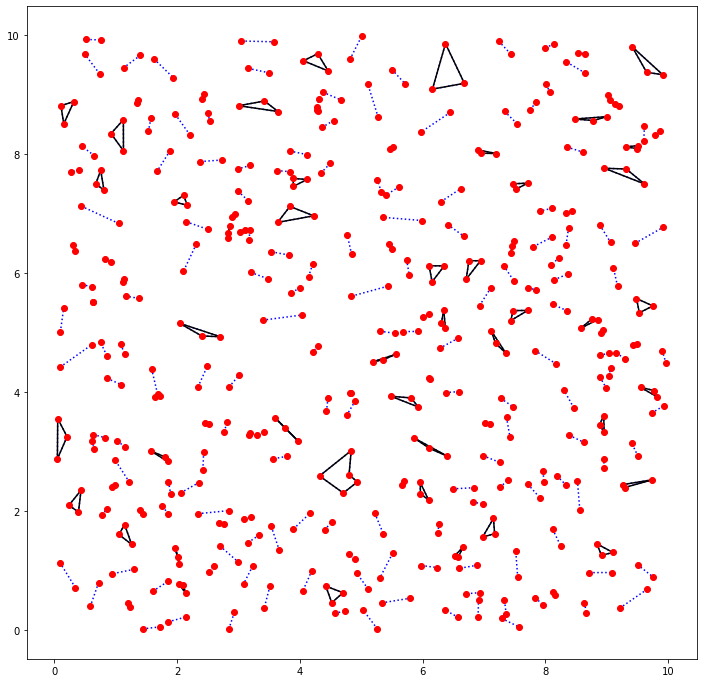

In [45]:
plt.rcParams["figure.figsize"] = (12,12)

for i in np.unique(sorted_matching, axis = 0):
    plt.plot(* sample[i].T, c = 'b', linestyle='dotted')
    
for i in polygons:
    plt.plot(* sample[i].T, c = 'k', linestyle='solid')

for p in sample:
    plt.plot(* p.T, marker = 'o', c = 'r')
    
plt.show()